In [1]:
%pip install tensorflow.keras
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 45.8 MB/s eta 0:00:01    |██████████▋                     | 79.4 MB 42.3 MB/s eta 0:00:04
     |████████████████████████████████| 25.8 MB 291 kB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 24.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 69.8 MB/s eta 0:00:01
     |███████████████████

In [1]:
import tensorflow.keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

/Users/laurabryan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



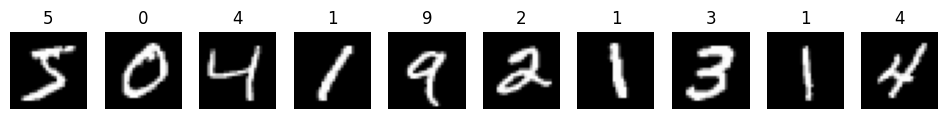

In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
plt.figure(figsize=(12,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
### END STUDENT CODE ###

In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
#Add the first layer
model.add(Dense(units=128, activation='relu', input_shape=(image_vector_size,)))
#add the last layer
model.add(Dense(units=num_classes, activation='softmax'))
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

/Users/laurabryan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
### END STUDENT CODE ###

Test loss: 1.95e+02
Test accuracy: 0.0954
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step


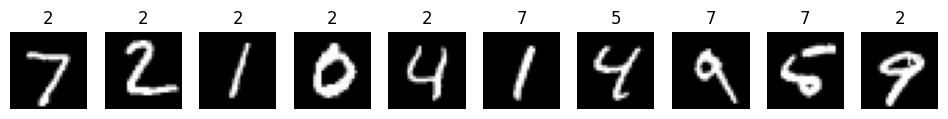

In [9]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict(x_test)

plt.figure(figsize=(12,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_pred_test[i]))
    plt.axis('off')
### --> call model.predict() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###

In [10]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 64
EPOCHS = 20

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8102 - loss: 10.3311 - val_accuracy: 0.8947 - val_loss: 0.6973
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8948 - loss: 0.5908 - val_accuracy: 0.9312 - val_loss: 0.3540
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9280 - loss: 0.3169 - val_accuracy: 0.9330 - val_loss: 0.3297
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.9394 - loss: 0.2474 - val_accuracy: 0.9415 - val_loss: 0.2755
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9484 - loss: 0.2002 - val_accuracy: 0.9425 - val_loss: 0.2761
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9482 - loss: 0.1968 - val_accuracy: 0.9498 - val_loss: 0.2326
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.9558 - loss: 0.1607 - val_accuracy: 0.9457 - val_loss: 0.2627
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9556 - loss: 0.1651 -

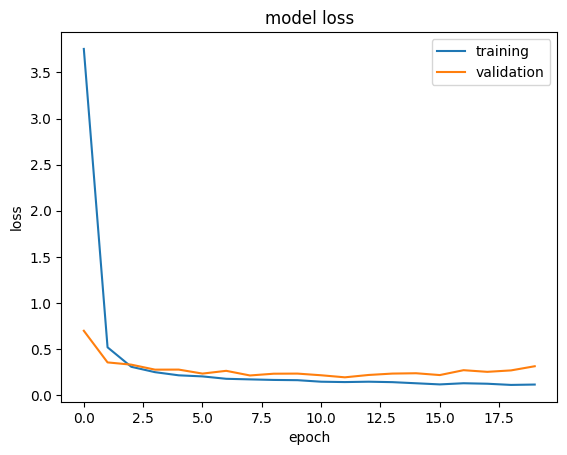

In [11]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

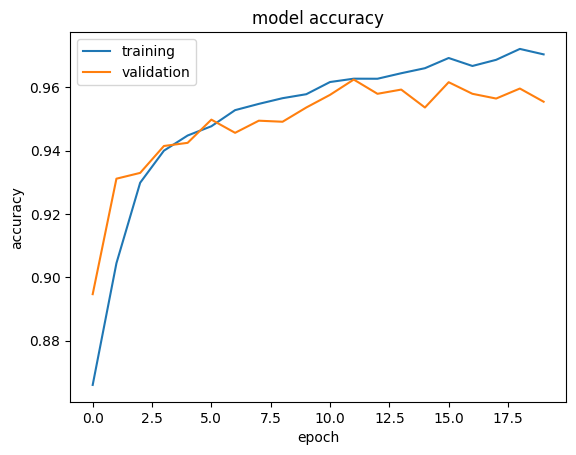

In [12]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [30]:
%pip install scikit-learn
%pip install seaborn
import sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 5.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Test loss: 0.34
Test accuracy: 0.951
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


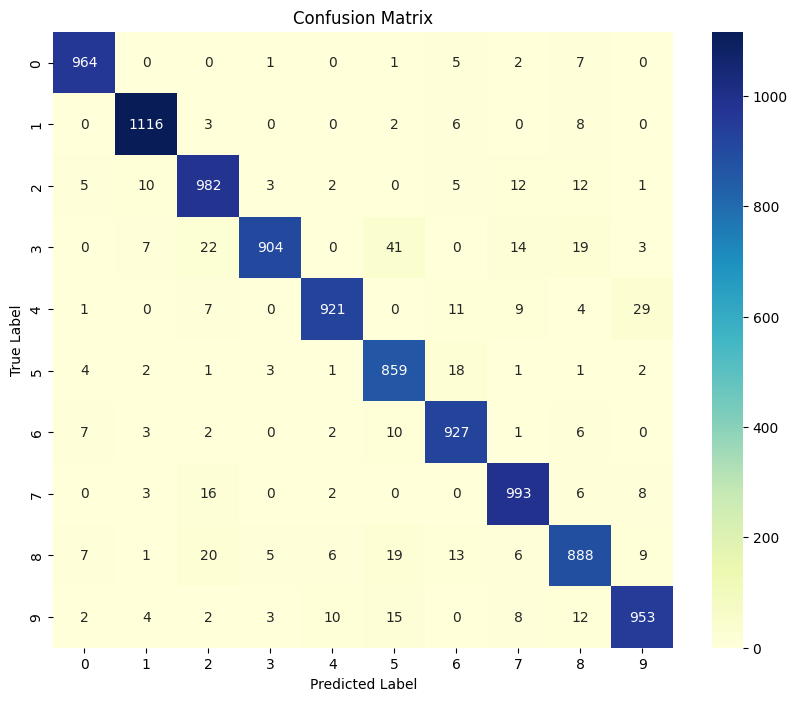

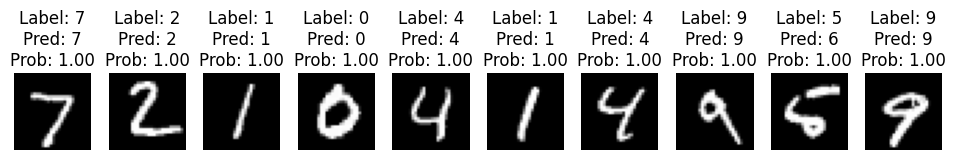

In [32]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct


from sklearn.metrics import confusion_matrix
import seaborn as sns
### STUDENT CODE HERE ###
cm = confusion_matrix(y_test_index, y_pred_test_index)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(12, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test_index[i]}\nPred: {y_pred_test_index[i]}\nProb: {y_pred_test_proba[i]:.2f}")
    plt.axis('off')
plt.show()

### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###

In [ ]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###